# Hierarchical LDA Demo

This notebook demonstrates how we can load the BBC Insight Dataset (http://mlg.ucd.ie/datasets/bbc.html), preprocess them via NLTK and run hierarchical LDA inference on the data. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
basedir = '../'
sys.path.append(basedir)

import pylab as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from hlda import HierarchicalLDA

import string
import glob

## 1. Load the BBC corpus

Load and preprocess text using NLTK. Below we load all tech articles from the corpus.

In [2]:
stopset = stopwords.words('english') + list(string.punctuation)
stemmer = PorterStemmer()

In [3]:
corpus = []
all_docs = []
vocab = set()

for filename in glob.glob('../bbc/tech/*.txt'):
    with open(filename) as f:
        try:
            doc = f.read().splitlines() 
            doc = filter(None, doc) # remove empty string
            doc = '. '.join(doc)
            doc = doc.translate(None, string.punctuation) # strip punctuations
            doc = doc.translate(None, '0123456789') # strip numbers        
            doc = doc.decode("utf8").encode('ascii', 'ignore') # ignore all fancy unicode characters
            all_docs.append(doc)        

            tokens = word_tokenize(str(doc))
            tokens = [stemmer.stem(w) for w in tokens if not w in stopset]
            vocab.update(tokens)
            corpus.append(tokens)      
        except UnicodeDecodeError:
            print 'Failed to load', filename

Create an inverted index for the words to position in the sorted vocab

In [4]:
vocab = sorted(list(vocab))
vocab_index = {}
for i, w in enumerate(vocab):
    vocab_index[w] = i

Total number of documents in the corpus

In [5]:
print len(all_docs)

401


Total number of vocab. Also print the first 500 words in the sorted vocab.

In [6]:
print len(vocab)
print vocab[0:500]

8447
['A', 'AC', 'AD', 'AI', 'AM', 'AP', 'AV', 'An', 'As', 'At', 'BT', 'Be', 'By', 'CD', 'CJ', 'CM', 'D', 'DC', 'DS', 'De', 'Dr', 'E', 'EA', 'EC', 'EQ', 'ET', 'EU', 'Ed', 'FM', 'FY', 'G', 'GB', 'GP', 'GT', 'Go', 'HD', 'HL', 'HP', 'He', 'I', 'ID', 'IE', 'II', 'IP', 'IR', 'IT', 'IV', 'Id', 'If', 'Im', 'In', 'Is', 'It', 'J', 'JF', 'Jo', 'K', 'L', 'LA', 'LG', 'Le', 'Li', 'M', 'MB', 'ME', 'MI', 'MP', 'Mb', 'Me', 'Mr', 'Ms', 'My', 'N', 'NM', 'NT', 'No', 'O', 'OF', 'OK', 'OR', 'OS', 'Of', 'Oh', 'On', 'Or', 'P', 'PB', 'PC', 'PP', 'PS', 'QL', 'QV', 'R', 'RA', 'SD', 'SI', 'SK', 'SP', 'SV', 'So', 'St', 'TT', 'TU', 'TV', 'To', 'UK', 'UN', 'US', 'UV', 'UX', 'Uk', 'Up', 'V', 'VH', 'VJ', 'W', 'We', 'X', 'XP', 'YH', u'aaa', 'aac', 'aadc', u'aarhu', 'aaron', u'abacu', u'abandon', u'abat', 'abbott', 'abensur', u'abet', u'abid', u'abil', u'abl', u'ablebodi', 'about', u'aboutroughli', u'aboveaverag', 'abraham', u'abramovich', 'abroad', u'abruptli', u'absenc', u'absolut', u'absorb', 'abstain', 'abstract', 

## 2. Visualise the data

Make some pretty word cloud using the Python Word Cloud package: https://github.com/amueller/word_cloud

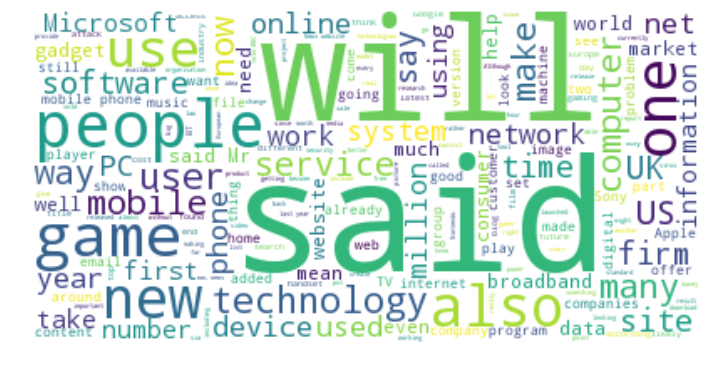

In [7]:
wordcloud = WordCloud(background_color='white').generate(' '.join(all_docs))
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3. Run hLDA

In [8]:
print len(vocab), len(corpus), len(corpus[0]), len(corpus[1])

8447 401 395 223


Convert words in the corpus into indices

In [9]:
new_corpus = []
for doc in corpus:
    new_doc = []
    for word in doc:
        word_idx = vocab_index[word]
        new_doc.append(word_idx)
    new_corpus.append(new_doc)

In [10]:
print len(vocab), len(new_corpus)
print corpus[0]
print new_corpus[0]

8447 401
['ink', u'help', 'drive', u'democraci', 'asia', 'the', 'kyrgyz', u'republ', 'small', u'mountain', 'state', 'former', 'soviet', u'republ', u'use', u'invis', 'ink', 'ultraviolet', u'reader', u'countri', u'elect', 'part', 'drive', 'prevent', u'multipl', u'vote', u'thi', 'new', u'technolog', u'caus', u'worri', u'guard', u'optim', 'among', u'differ', u'sector', u'popul', 'In', 'effort', 'live', u'reput', 'island', u'democraci', 'kyrgyz', u'presid', 'askar', 'akaev', u'push', 'law', u'requir', 'use', 'ink', u'upcom', u'parliamentari', u'presidenti', u'elect', 'the', 'US', u'govern', u'agre', 'fund', u'expens', u'associ', u'decis', 'the', 'kyrgyz', u'republ', 'seen', u'mani', u'expert', u'backslid', 'high', 'point', u'reach', u'mid', u'hastili', u'push', 'referendum', u'reduc', u'legisl', 'branch', 'one', 'chamber', u'deputi', 'the', 'use', 'ink', 'one', 'part', u'gener', 'effort', 'show', u'commit', u'toward', 'open', u'elect', 'german', u'embassi', u'soro', u'foundat', 'kyrgyz', u'

Create hierarchical LDA object and run the sampler.

In [13]:
n_samples = 500
hlda = HierarchicalLDA(new_corpus, vocab, alpha=1, gamma=1.0, eta=1.0, num_levels=4)
hlda.estimate(n_samples, display_topics=50, n_words=5, with_weights=False)

HierarchicalLDA sampling
..................................................
topic 0 (level=0, total_words=63447, documents=401): the, said, peopl, use, mobil, 
    topic 5 (level=1, total_words=30847, documents=401): said, the, softwar, use, firm, 
        topic 17 (level=2, total_words=279, documents=75): printer, cartridg, ink, woman, inkjet, 
            topic 54 (level=3, total_words=124, documents=7): jayn, prosecutor, sister, convict, sale, 
            topic 97 (level=3, total_words=14, documents=5): optinrealbig, reduct, law, capgemini, ocean, 
            topic 150 (level=3, total_words=14, documents=5): boyd, mit, deriv, youv, heat, 
            topic 153 (level=3, total_words=6, documents=5): weather, sweep, scale, lanzon, fluctuat, 
            topic 179 (level=3, total_words=4, documents=2): sky, argument, declar, runway, foggi, 
            topic 188 (level=3, total_words=10, documents=5): brazilian, playabl, creation, napster, costli, 
            topic 191 (level=3, tot

KeyboardInterrupt: 